# Introduction

The aim of this analysis is to investigate which metrics are most important in determining the number of monetised views a video gets - in other words, how much advertising revenue the video generates.

# Reading in the Data, Calculating Correlation Coefficients

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WildBrain Spark Analyst Stream Exercise _ Raw Data.csv')

In [3]:
df.head(5)

,month_of_year,channel_alias,video_id_alias,video_duration_sec,region,watch_time_minutes,views,avg_view_duration_mins,avg_audience_completion,monetised_views
0,2018-03,Channel 11,13cf9cd2-e4f7-403a-a4b4-ffc49404ac6a,152.0,NaN,30.466433,21,1.450783,57.908102,NaN
1,2018-04,Channel 11,13cf9cd2-e4f7-403a-a4b4-ffc49404ac6a,152.0,Oceania,215.163367,117,1.839003,69.521702,0.0
2,2018-09,Channel 11,13cf9cd2-e4f7-403a-a4b4-ffc49404ac6a,152.0,NaN,4.397233,7,0.628176,29.405000,NaN
3,2018-11,Channel 16,3b3832d8-1871-456d-be14-36f64ddb2458,2146.0,North America,2608.144950,2394,1.089451,4.040089,2041.0
4,2018-02,Channel 20,6d1fa59c-c134-4891-98b9-977cdeb2ddc3,280.0,Asia,0.081667,1,0.081667,1.750000,NaN


In [4]:
df.describe()

,video_duration_sec,watch_time_minutes,views,avg_view_duration_mins,avg_audience_completion,monetised_views
count,3.215240e+05,3.232700e+05,3.232700e+05,323270.000000,323270.000000,2.051160e+05
mean,2.050133e+03,7.489229e+03,1.584218e+03,4.309008,22.568238,1.631310e+03
std,5.273953e+04,1.038906e+05,2.498763e+04,5.128087,20.665371,2.059110e+04
min,2.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.650000e+02,6.153750e+00,3.000000e+00,1.008813,5.889189,3.000000e+00
50%,1.309000e+03,5.564940e+01,1.800000e+01,2.741325,18.412246,1.200000e+01
75%,1.467000e+03,4.681822e+02,1.170000e+02,6.161008,33.664239,9.500000e+01
max,6.480784e+06,1.278480e+07,4.324856e+06,152.248033,749.418605,2.985977e+06


There seems to be quite a large range of values - the upper quartiles of the dataset are far below the maximum values, so we'll need to keep this in mind.  Interestingly, average audience completion (defined as the avg. % of the video's duration viewed by the audience) goes up to 749%, so this will need to be kept in mind when performing analysis.

In [5]:
#Calculating correlation coefficients for the monetised_views column, and dropping the monetised_views column from this.
correlations = df.corr()
mv_correlations = correlations['monetised_views'].drop('monetised_views')
mv_correlations

video_duration_sec         0.002020
watch_time_minutes         0.795157
views                      0.890988
avg_view_duration_mins    -0.000981
avg_audience_completion    0.035687
Name: monetised_views, dtype: float64

Text(0.5, 1.0, 'Relationship between Columns and monetised_views')

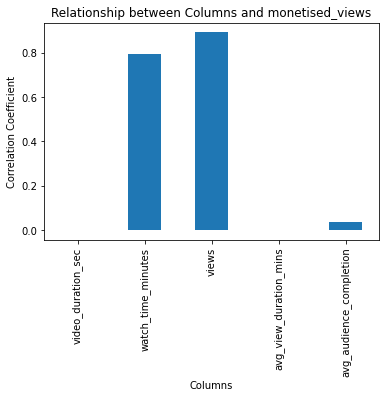

In [6]:
#Plotting the above coefficients onto a bar plot
mv_correlations.plot.bar()
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Relationship between Columns and monetised_views')

The watch_time_minutes and views columns are by far the most strongly correlated, so we'll focus our analysis on these initially.

# Investigating the relationship between Monetised Views and Views/Total Watch Time in Minutes

Text(0.5, 1.0, 'Relationship Between Total Watch Time vs Number of Monetised Views')

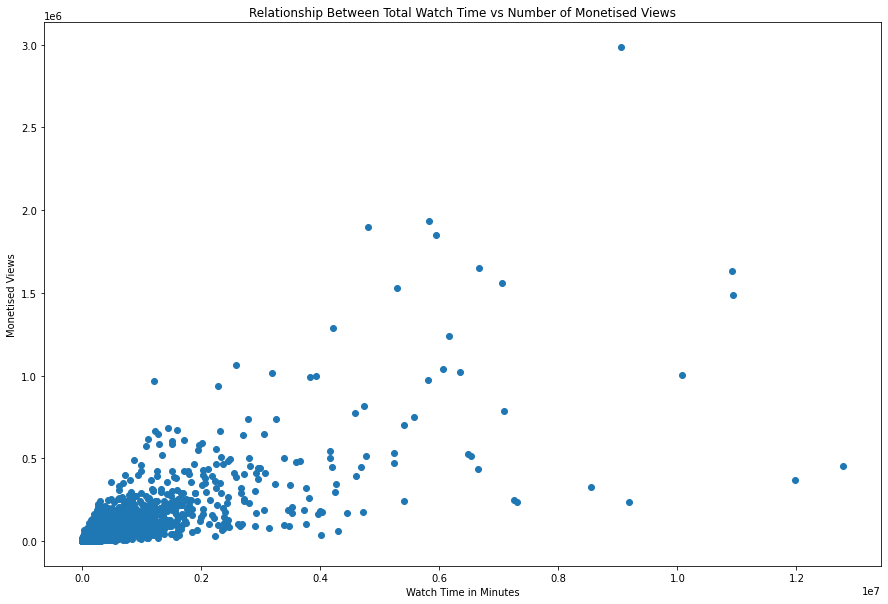

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(x = df['watch_time_minutes'], y = df['monetised_views'])
plt.xlabel('Watch Time in Minutes')
plt.ylabel('Monetised Views')
plt.title('Relationship Between Total Watch Time vs Number of Monetised Views')

Text(0.5, 1.0, 'Relationship Between Total Number of Views vs Number of Monetised Views')

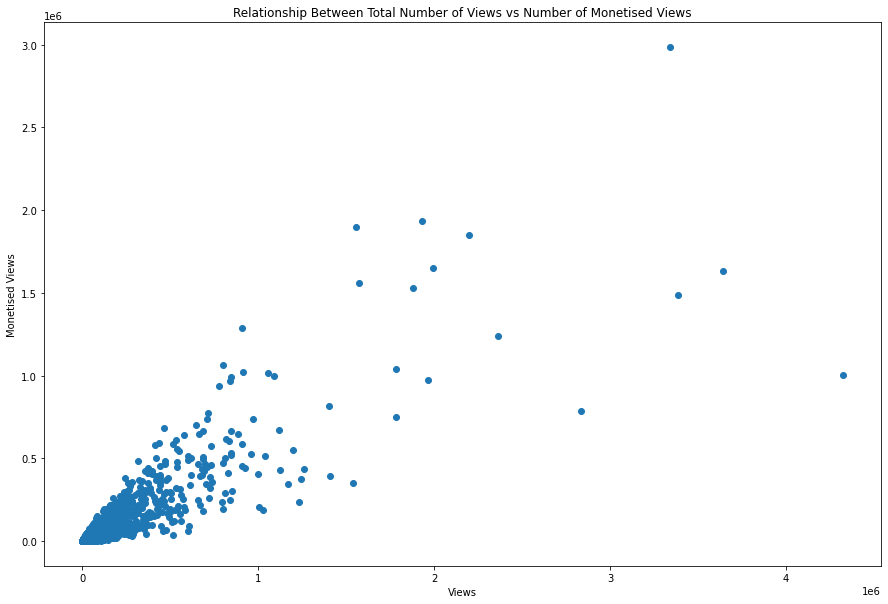

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(x = df['views'], y = df['monetised_views'])
plt.xlabel('Views')
plt.ylabel('Monetised Views')
plt.title('Relationship Between Total Number of Views vs Number of Monetised Views')

Both of these plots have similar shapes - they indicate a strong positive correlation as the correlation coefficients suggested - the greater the total watch time or views of a video, the more advertising revenue it should generate.

# Investigating Average Audience Video Completion

A column I was interested in was the average audience video completion, as you'd expect that audience engagement would be a factor in generating advertising revenue. We just need to keep in mind that some of the data seems erroneous, so we'll limit the x-axis between 0 and 100%.

Text(0.5, 1.0, 'Relationship Between Average Audience Video Completion vs Number of Monetised Views')

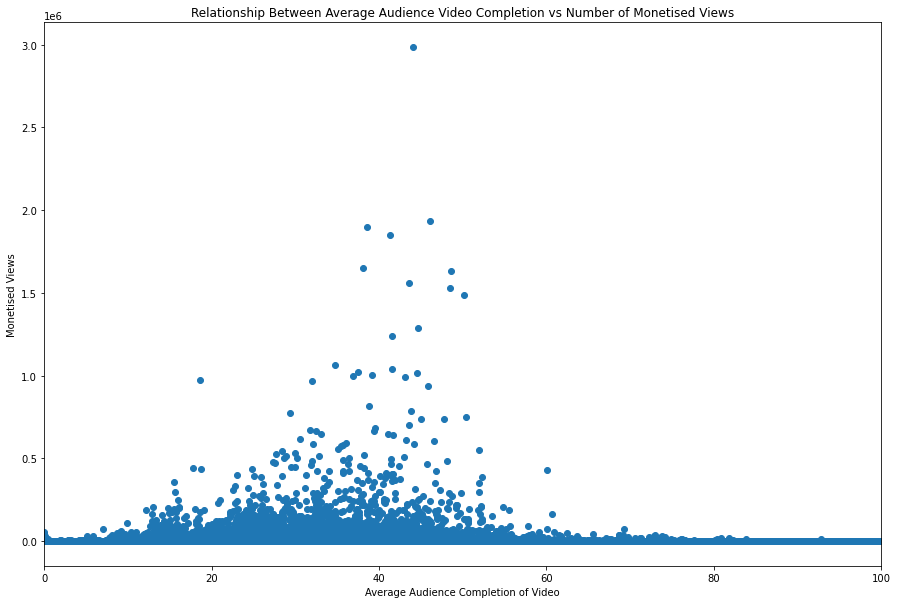

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(x = df['avg_audience_completion'], y = df['monetised_views'])
plt.xlabel('Average Audience Completion of Video')
plt.ylabel('Monetised Views')
plt.xlim([0, 100])
plt.title('Relationship Between Average Audience Video Completion vs Number of Monetised Views')

It seems to be the case that the videos which have the most monetisation views occur between 15-55% of audience video completion.  This is obviously dependent on a number of factors, including the length of the video, so it would be difficult at this stage to suggest that the optimal audience video completion should be between this range - more analysis should be performed.

# Investigating the Relationship between Monetised Views and Region

You'd expect the region which the user is from would have some kind of effect on ad revenue.  To investigate this, I'll create a pivot table where the average number of monetised views by Region of the world is grouped together, and plot the resulting pivot table as a bar plot.

In [10]:
#Creating the pivot table, the default aggregation function is np.mean so this will not need to be specified
mv_pivot_table = pd.pivot_table(df, values='monetised_views',columns='region') 
mv_pivot_table

region,Africa,Asia,Europe,LatAm & Caribbean,Middle East,North America,Oceania
monetised_views,382.299675,2020.573843,2081.49646,1554.162617,758.295453,2842.437903,452.251896


Text(0.5, 1.0, 'Average Monetised Views for Each Region')

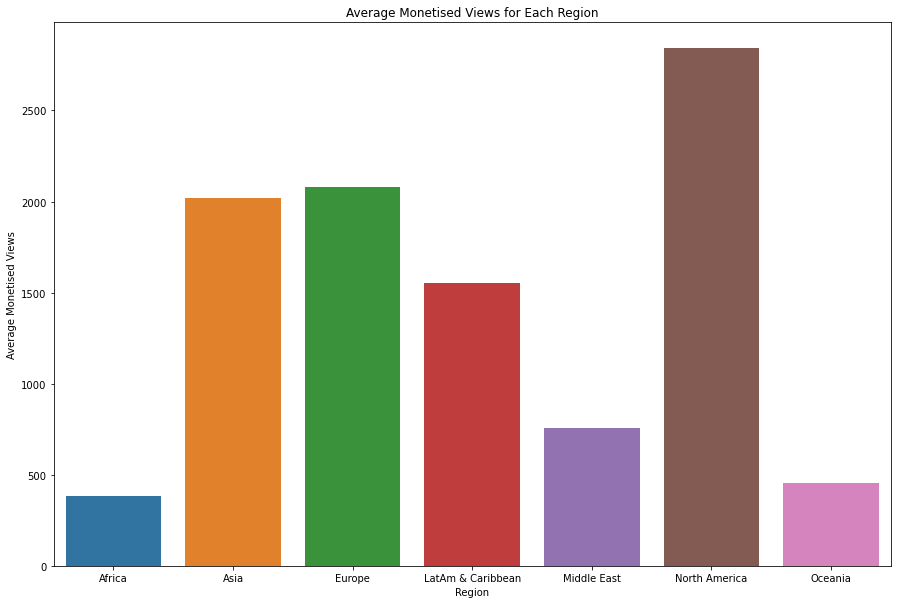

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(data=mv_pivot_table)
plt.xlabel('Region')
plt.ylabel('Average Monetised Views')
plt.title('Average Monetised Views for Each Region')

It is evident that North America is by far the region with the most average monetised views.  This is followed by Asia, Europe and Latin America/Caribbean.  I'll continue this investigation by doing the same thing with the Total Watch Time and Total Views.

# Looking at the Region - Watch Time/Views Relationship

In [12]:
wt_pivot_table = pd.pivot_table(df, values='watch_time_minutes',columns='region')

Text(0.5, 1.0, 'Average Total Watch Time for Each Region')

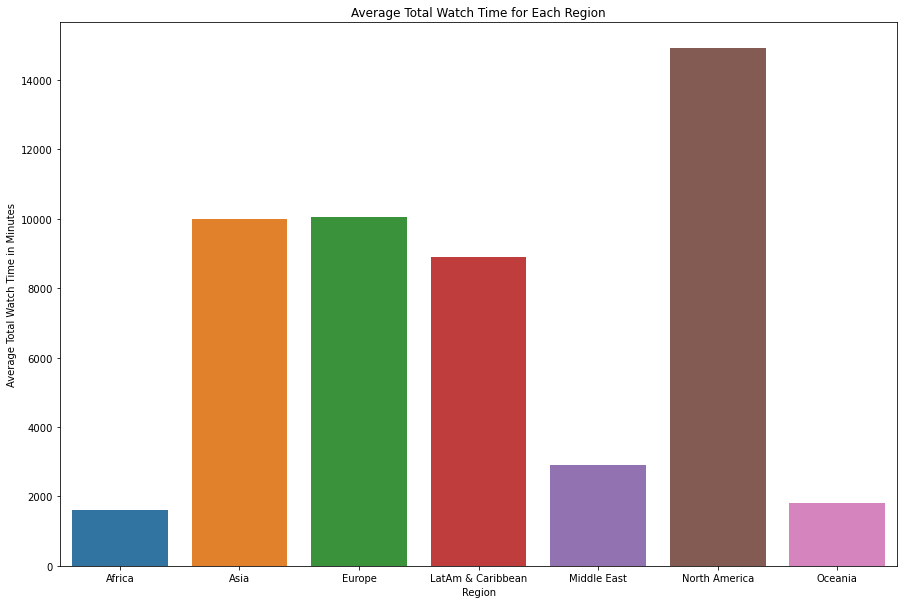

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(data=wt_pivot_table)
plt.xlabel('Region')
plt.ylabel('Average Total Watch Time in Minutes')
plt.title('Average Total Watch Time for Each Region')

In [14]:
v_pivot_table = pd.pivot_table(df, values='views',columns='region')

Text(0.5, 1.0, 'Average Number of Views for Each Region')

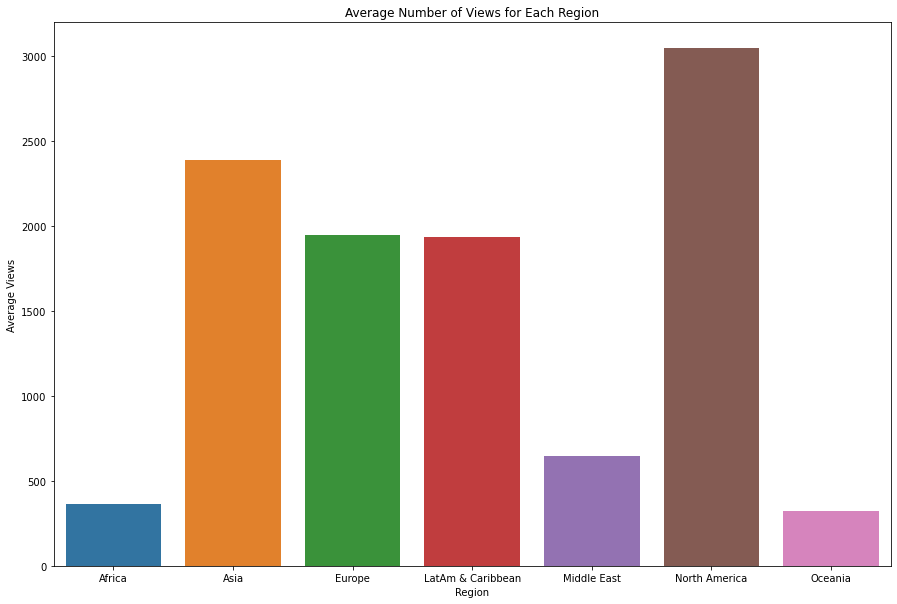

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(data=v_pivot_table)
plt.xlabel('Region')
plt.ylabel('Average Views')
plt.title('Average Number of Views for Each Region')

The bar plots in each case seem very similar to the first, however when investigating the average number of views, Asia seems to have a higher average than either Europe or the LatAm & Caribbean regions.  We could suggest that Asia would be the second best region to target users from in this case.

# Investigating the Month of Year Relationship

We'll do the same as we did above, however grouping these columns by the month of year, to see whether publishing videos at a certain time of year could generate more advertising revenue than others.

In [16]:
mv_pivot_table_month = pd.pivot_table(df, values='monetised_views',columns='month_of_year')

Text(0.5, 1.0, 'Average Monetised Views by Month of 2018')

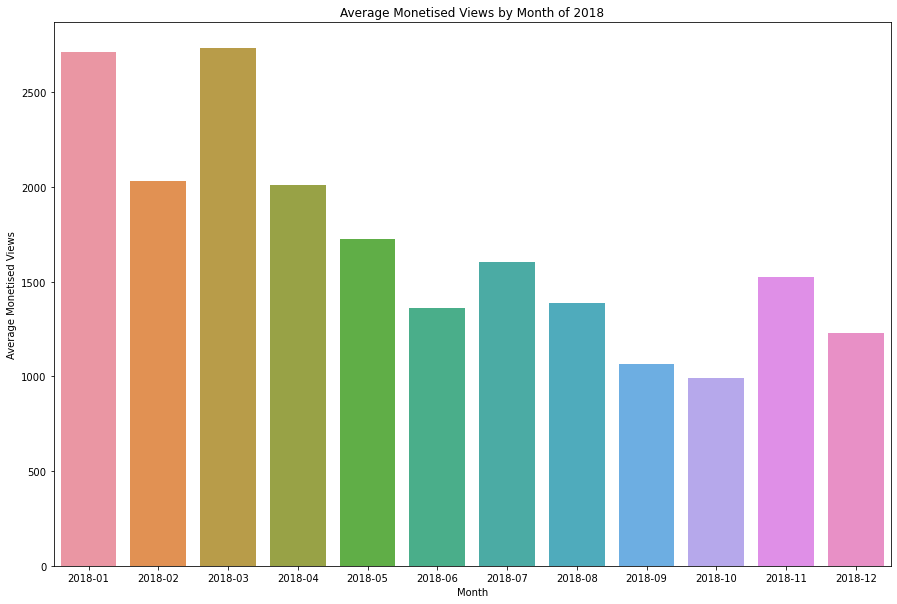

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(data=mv_pivot_table_month)
plt.xlabel('Month')
plt.ylabel('Average Monetised Views')
plt.title('Average Monetised Views by Month of 2018')

In [18]:
v_pivot_table_month = pd.pivot_table(df, values='views',columns='month_of_year')

Text(0.5, 1.0, 'Average Views by Month of 2018')

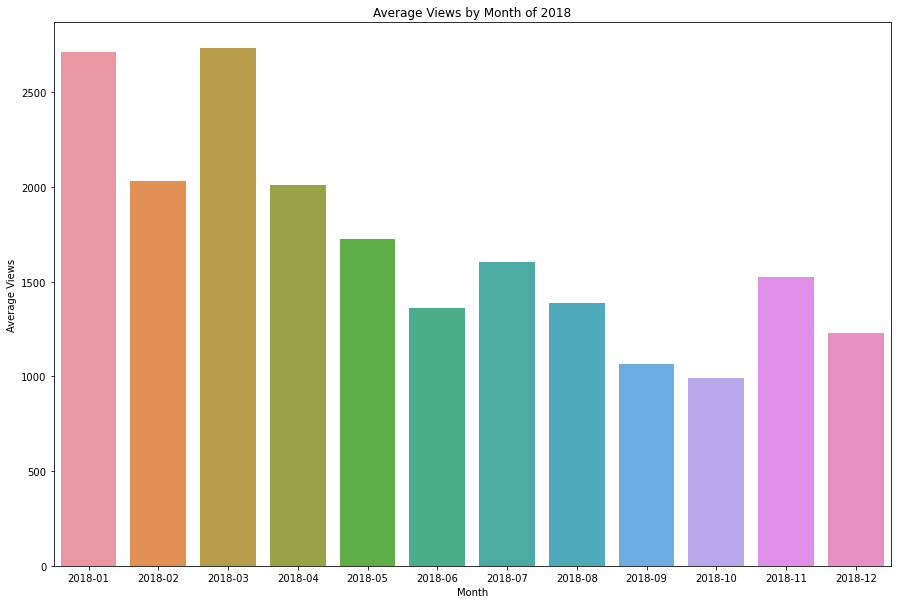

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(data=mv_pivot_table_month)
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.title('Average Views by Month of 2018')

In [20]:
wt_pivot_table_month = pd.pivot_table(df, values='watch_time_minutes',columns='month_of_year')
wt_pivot_table_month

month_of_year,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
watch_time_minutes,14301.186509,8997.269237,9896.45893,8714.619813,6844.67777,6855.103157,8948.204368,7897.848396,5277.551333,5047.400847,4794.304346,5523.189251


Text(0.5, 1.0, 'Average Watch Time by Month of 2018')

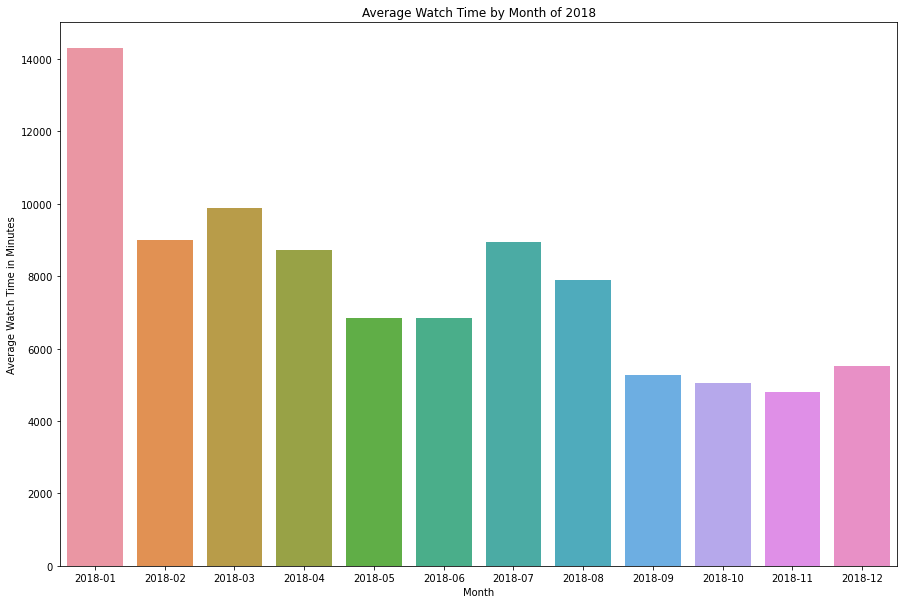

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(data=wt_pivot_table_month)
plt.xlabel('Month')
plt.ylabel('Average Watch Time in Minutes')
plt.title('Average Watch Time by Month of 2018')

These plots indicate that the average watch time, average views and average monetised views are all higher at the beginning of the year than towards the end, which is very interesting.  In particular, January and March are months where the highest monetised views and views are seen.  Interestingly however, January has by far the greatest average total watch time of any other month.  This could indicate that January is a very strong month to create content in.

Of course, this could just have been when the data was collected and there were better performing channels then.  More yearly data would need to be collected to identify whether this is indeed the case.